In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

* Analyze only the users and not the admins
* Take into account only logs from the table checker where the status is ready
* You can choose the palette that you enjoy
* The linewidth should be 3
* The background of the graph is gray
* The height should be 10, and the width should 1.5x in relation to the height
* The fontsize of the title should be 30
* The fontsize of the axises labels is 15

In [221]:
query = """
SELECT uid, timestamp,
SUM(numTrials) AS numTrials
FROM(
  SELECT *
  FROM checker
  WHERE uid LIKE "user_%"
  AND status = "ready"
  AND labname = "project1")
GROUP BY uid, timestamp
ORDER BY timestamp
"""

In [222]:
df = pd.read_sql(query, con)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        951 non-null    object
 1   timestamp  951 non-null    object
 2   numTrials  951 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 128.9 KB


In [223]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   uid        951 non-null    category
 1   timestamp  951 non-null    category
 2   numTrials  951 non-null    int64   
dtypes: category(2), int64(1)
memory usage: 114.8 KB


In [224]:
df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


In [226]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


In [236]:
con.close()

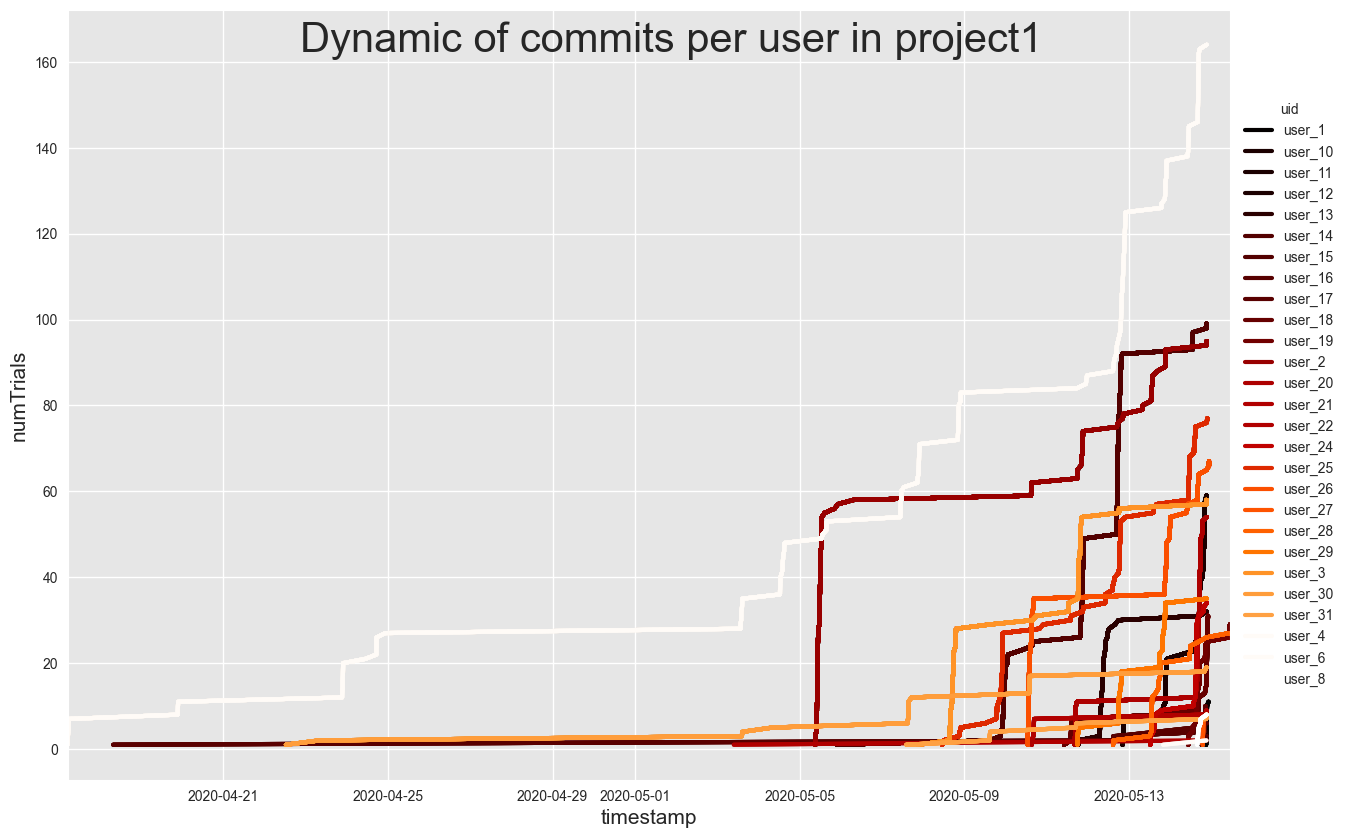

In [237]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 10)

sns.lineplot(
  data=df,
  x='timestamp',
  y='numTrials',
  hue='uid',
  hue_order=df['uid'].sort_values(ascending=True),
  linewidth=3.0,
  palette='gist_heat',
  ax=ax
)

ax.legend(
  title='uid',
  loc='right',
  bbox_to_anchor=(1.1, 0.5),
  facecolor='white',
  edgecolor='white'
)

ax.set_facecolor((0.9, 0.9, 0.9))
ax.grid(True, which='both', color='white', linewidth=1)
ax.margins(x=0.0)

fig.text(
  x=0.2,
  y=0.945,
  s='Dynamic of commits per user in project1',
  fontsize=30,
  transform=ax.transAxes
)
ax.set_xlabel('timestamp', fontsize=15)

ax.set_ylabel('numTrials', fontsize=15)

plt.show()

### At the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):
* “Which user was the leader in the number of commits almost all of the time?” The answer: user_*.
* Answer: user_4
* “Which user was the leader for only a short period of time?” The answer: user_*.
* Answer: user_2